<a href="https://colab.research.google.com/github/MrLuksR/Sesgos-en-Noticias/blob/main/An%C3%A1lisis_de_Sesgos_en_Noticias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install gensim

import gensim
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
df = pd.read_csv('df_total.csv')
df.head()

,url,news,Type
0,https://www.larepublica.co/redirect/post/3201905,Durante el foro La banca articulador empresari...,Otra
1,https://www.larepublica.co/redirect/post/3210288,El regulador de valores de China dijo el domin...,Regulaciones
2,https://www.larepublica.co/redirect/post/3240676,En una industria históricamente masculina como...,Alianzas
3,https://www.larepublica.co/redirect/post/3342889,Con el dato de marzo el IPC interanual encaden...,Macroeconomia
4,https://www.larepublica.co/redirect/post/3427208,Ayer en Cartagena se dio inicio a la versión n...,Otra


In [ ]:
corpus = df['news'].tolist()
sentences = [frase.lower().split() for frase in corpus]
print(sentences[0])

['durante', 'el', 'foro', 'la', 'banca', 'articulador', 'empresarial', 'para', 'el', 'desarrollo', 'sostenible', 'el', 'director', 'de', 'sostenibilidad', 'y', 'clientes', 'globales', 'de', 'bbva', 'en', 'colombia', 'andrés', 'garcía', 'aseguró', 'que', 'es', 'importante', 'entender', 'que', 'la', 'sostenibilidad', 'no', 'la', 'podemos', 'asociar', 'a', 'mayores', 'costos.', 'yo', 'creo', 'que', 'el', 'no', 'tener', 'un', 'concepto', 'de', 'negocio', 'sostenible', 'puede', 'tener', 'un', 'mayor', 'impacto', 'de', 'lo', 'que', 'imaginamos.para', 'garcía', 'el', 'reto', 'más', 'importante', 'es', 'no', 'cambiar', 'prioridades', 'ni', 'que', 'compitan', 'entre', 'sí', 'necesariamente.', 'en', 'muchos', 'de', 'los', 'casos', 'se', 'debe', 'tratar', 'de', 'mantener', 'la', 'prioridad', 'en', 'cuanto', 'a', 'la', 'ambición', 'de', 'negocios', 'más', 'sostenibles', 'un', 'reto', 'enorme', 'por', 'la', 'coyuntura.', 'la', 'sostenibilidad', 'nos', 'abre', 'oportunidades', 'a', 'mejores', 'fuent

In [ ]:
model = Word2Vec(
    sentences,
    vector_size=50,
    window=3,
    min_count=1,
    workers=4,
    sg=1
)

print(model.wv["estudiante"])
print(len(model.wv["estudiante"]))

[-0.04507576  0.03682334  0.08378353 -0.04184407 -0.10108785 -0.08965418
  0.03421918  0.16956416 -0.2002501  -0.08542847 -0.03446147 -0.1112574
 -0.06532297  0.00056904 -0.01781482  0.00101662  0.14159326  0.11178633
 -0.08873388 -0.09058525  0.10322832 -0.00130201  0.29474226  0.02489731
  0.0730792   0.0581364  -0.07719165 -0.03204714 -0.01683099  0.0945531
  0.01712713 -0.14901225  0.1426218  -0.01986849 -0.1334434  -0.07321501
  0.01877393 -0.00401059  0.09390295 -0.0325564   0.14734818 -0.01073081
  0.02635427 -0.02497529  0.27911076 -0.02883897  0.13390033 -0.12222183
  0.03686911  0.1734594 ]
50


In [ ]:
palabras = ['pobre', 'rico', 'rica', 'hombre', 'mujer', 'vagabundo', 'feo', 'fea']
palabras_validas = [p for p in palabras if p in model.wv]
print("Palabras que se van a graficar:", palabras_validas)

Palabras que se van a graficar: ['pobre', 'rico', 'rica', 'hombre', 'mujer']


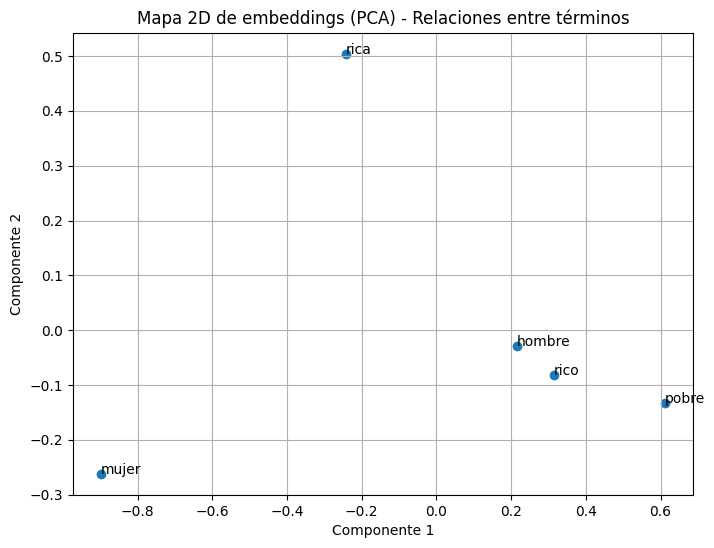

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

vectores = [model.wv[p] for p in palabras_validas]

pca = PCA(n_components=2)
coords_2d = pca.fit_transform(vectores)

plt.figure(figsize=(8,6))

x_vals = coords_2d[:, 0]
y_vals = coords_2d[:, 1]

plt.scatter(x_vals, y_vals)

for i, palabra in enumerate(palabras_validas):
    plt.annotate(palabra, (x_vals[i], y_vals[i]))

plt.title("Mapa 2D de embeddings (PCA) - Relaciones entre términos")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.grid(True)
plt.show()